In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data

df = pd.read_csv('hearing_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<Axes: xlabel='age', ylabel='physical_score'>

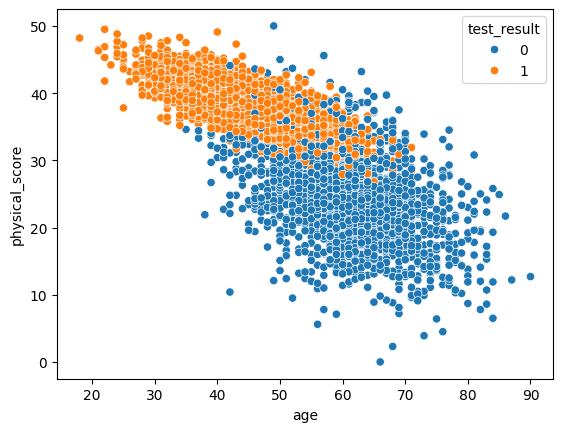

In [4]:
sns.scatterplot(x='age',y='physical_score',data=df,hue = 'test_result')

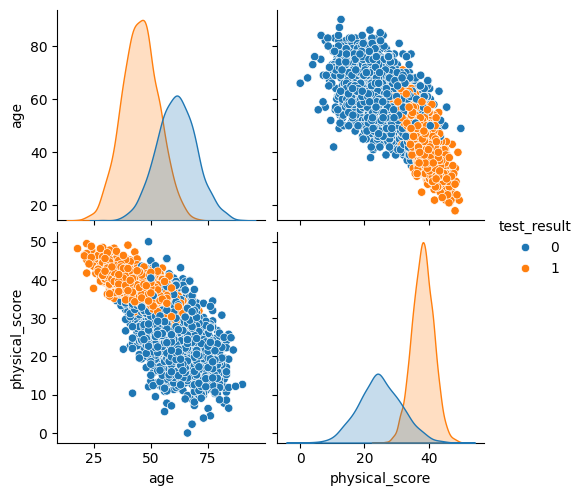

In [5]:
sns.pairplot(df,hue='test_result')

<Axes: xlabel='test_result', ylabel='count'>

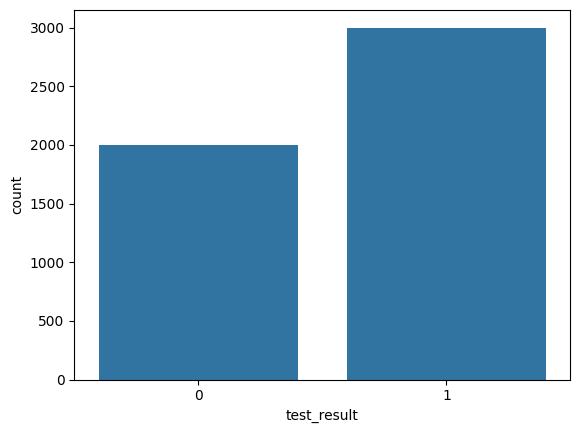

In [6]:
sns.countplot(data=df,x='test_result')

In [7]:
# Find the correlation

for column in df.columns:
    corr = np.corrcoef(df['test_result'],df[column])
    print(f"Correlation between test result and {column} = {corr[0][1]}")

Correlation between test result and age = -0.6831706796301823
Correlation between test result and physical_score = 0.7927158178562392
Correlation between test result and test_result = 1.0


In [8]:
# decide input and output variable

x = df.drop('test_result',axis = 1)
y = df['test_result']

In [9]:
# split the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [10]:
# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# create the model
model = LogisticRegression()

# train the model
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_prediction = model.predict(x_test)

In [13]:
print(y_prediction)

[0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 

In [14]:
# Model Evaluation Parameters 

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
cm = confusion_matrix(y_test,y_prediction)

In [17]:
print(cm)

[[326  58]
 [ 35 581]]


In [18]:
right_identification = cm[0][0] + cm[1][1]
print(right_identification)

907


In [19]:
accuracy = accuracy_score(y_test,y_prediction)

In [20]:
print(f"Accuracy = {accuracy*100}")

Accuracy = 90.7


In [22]:
from sklearn.metrics import f1_score,recall_score,ConfusionMatrixDisplay


In [23]:
f1score = f1_score(y_test,y_prediction)

In [24]:
print(f"F1 Score = {f1score}")

F1 Score = 0.9258964143426295


In [25]:
recall = recall_score(y_test,y_prediction)
print(f"Recall Score = {recall}")

Recall Score = 0.9431818181818182


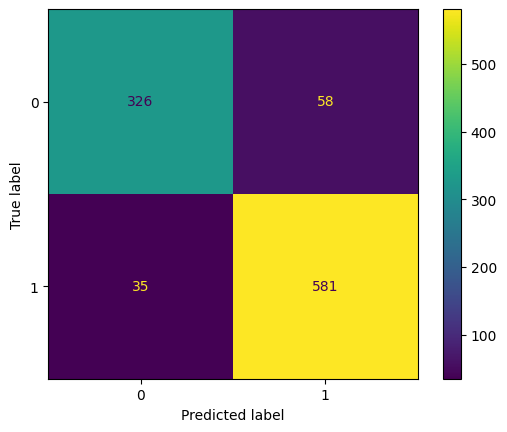

In [33]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

In [27]:
# classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_prediction))

In [ ]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,y_prediction)
print(f"ROC Score = {roc}")

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(model,x_test,y_test)
plt.plot([0,1],[0,1],color="red",linestyle="--")